In [3]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib as mlp
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
mlp.style.use("seaborn")
import statsmodels
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

In [20]:
ie_data = pd.read_excel("../data/ie_data.xls", sheet_name="Data", skiprows=7)
ie_data.drop(ie_data.tail(1).index, inplace=True)
ie_data.rename(columns={"Yield": "Excess_CAPE_Yield", "Real Return": "Real_Returns_Equity", "Real Return.1": "Real_Returns_Bond", "Returns.2": "Excess_Real_Returns_Equity"}, inplace=True)
print(ie_data.columns)
ie_data.head()

Index(['Date', 'P', 'D', 'E', 'CPI', 'Fraction', 'Rate GS10', 'Price',
       'Dividend', 'Price.1', 'Earnings', 'Earnings.1', 'CAPE', 'Unnamed: 13',
       'TR CAPE', 'Unnamed: 15', 'Excess_CAPE_Yield', 'Returns', 'Returns.1',
       'Real_Returns_Equity', 'Real_Returns_Bond',
       'Excess_Real_Returns_Equity'],
      dtype='object')


,Date,P,D,E,CPI,Fraction,Rate GS10,Price,Dividend,Price.1,...,CAPE,Unnamed: 13,TR CAPE,Unnamed: 15,Excess_CAPE_Yield,Returns,Returns.1,Real_Returns_Equity,Real_Returns_Bond,Excess_Real_Returns_Equity
0,1871.01,4.44,0.26,0.4,12.4641,1871.041667,5.32,97.250271,5.694836,97.250271,...,NaN,NaN,NaN,NaN,NaN,1.004177,1.000000,0.130609,0.092504,0.038106
1,1871.02,4.5,0.26,0.4,12.8446,1871.125000,5.32333,95.644049,5.526101,96.104557,...,NaN,NaN,NaN,NaN,NaN,1.004180,0.974424,0.130858,0.094635,0.036224
2,1871.03,4.61,0.26,0.4,13.035,1871.208333,5.32667,96.551327,5.445411,97.472173,...,NaN,NaN,NaN,NaN,NaN,1.004183,0.964209,0.130951,0.096186,0.034765
3,1871.04,4.74,0.26,0.4,12.5592,1871.291667,5.33,103.034548,5.651684,104.492692,...,NaN,NaN,NaN,NaN,NaN,1.004185,1.004919,0.122056,0.090972,0.031084
4,1871.05,4.86,0.26,0.4,12.2738,1871.375000,5.33333,108.099637,5.783108,110.118209,...,NaN,NaN,NaN,NaN,NaN,1.004188,1.032591,0.122638,0.089488,0.033150


## Taxes

In [41]:
ie_data = pd.read_csv("../data/ie_data_tax.csv", index_col=False)
ie_data.drop(ie_data.tail(1).index, inplace=True)
print(ie_data.columns)

Index(['Date', 'SP_Index', 'Dividend', 'Earnings', 'CPI', 'Date_Fraction',
       'Interest_Rate_GS10', 'Real_Price', 'Real_Dividend',
       'Real_Total_Return_Price', 'Real_Earnings', 'Real_TR_Scaled_Earnings',
       'CAPE', 'Unnamed: 13', 'TR_CAPE', '10_Year_Avg_Real_Earnings',
       'Current_Corporate_Tax_Rate', '6M_Forward_Corporate_Tax_Rate',
       'Nominal_Pre_Tax_Earnings_Per_Share', 'Real_Pre_Tax_Earnings_Per_Share',
       'Buybacks/Dividends', 'Buybacks/Price', 'Num_Shares_Boughtback',
       '10Y_Avg_Pre_Tax_Earnings', 'ADJ_CAPE', 'Unnamed: 25',
       'Excess_CAPE_Yield', 'Monthly_Total_Bond_Returns',
       'Real_Total_Bond_Returns', '10Y_Annualized_Stock_Real_Return',
       '10_Year_Annualized_Bond_Real_Return',
       'Real_10Y_Excess_Annualized_Returns'],
      dtype='object')


In [42]:
# preprocessing
preprocess = lambda x: float(x.replace(" ", "").replace(",", "")) if not isinstance(x, float) else x
ie_data["CAPE"] = ie_data["CAPE"].apply(preprocess)
ie_data["Real_Total_Return_Price"] = ie_data["Real_Total_Return_Price"].apply(preprocess)
ie_data["10Y_Annualized_Stock_Real_Return"] = ie_data["10Y_Annualized_Stock_Real_Return"].apply(lambda x: float(x.replace("%", "")) if type(x)!=float else x)
ie_data["10Y_Annualized_Stock_Real_Return"] = ie_data["10Y_Annualized_Stock_Real_Return"]/100

In [43]:
ie_data.head()

,Date,SP_Index,Dividend,Earnings,CPI,Date_Fraction,Interest_Rate_GS10,Real_Price,Real_Dividend,Real_Total_Return_Price,...,Num_Shares_Boughtback,10Y_Avg_Pre_Tax_Earnings,ADJ_CAPE,Unnamed: 25,Excess_CAPE_Yield,Monthly_Total_Bond_Returns,Real_Total_Bond_Returns,10Y_Annualized_Stock_Real_Return,10_Year_Annualized_Bond_Real_Return,Real_10Y_Excess_Annualized_Returns
0,1871.01,4.44,0.26,0.4,12.46,1871.04,5.32,96.47,5.65,96.47,...,100.00,NaN,NaN,NaN,NaN,1.0,1.00,0.1306,9.25%,3.81%
1,1871.02,4.50,0.26,0.4,12.84,1871.13,5.32,94.87,5.48,95.33,...,100.00,NaN,NaN,NaN,NaN,1.0,0.97,0.1309,9.46%,3.62%
2,1871.03,4.61,0.26,0.4,13.03,1871.21,5.33,95.77,5.40,96.69,...,100.00,NaN,NaN,NaN,NaN,1.0,0.96,0.1310,9.62%,3.48%
3,1871.04,4.74,0.26,0.4,12.56,1871.29,5.33,102.20,5.61,103.65,...,99.99,NaN,NaN,NaN,NaN,1.0,1.00,0.1221,9.10%,3.11%
4,1871.05,4.86,0.26,0.4,12.27,1871.38,5.33,107.23,5.74,109.23,...,99.99,NaN,NaN,NaN,NaN,1.0,1.03,0.1226,8.95%,3.31%


### Original CAPE

In [44]:
# period from 1881-2006
split_period = 2007.01
x = np.log((np.array(ie_data[(ie_data["Date"]<split_period)]["CAPE"]).astype(float)))
x = sm.add_constant(x)
y = np.array(ie_data[(ie_data["Date"]<split_period)]["10Y_Annualized_Stock_Real_Return"]).astype(float)

model = sm.OLS(y, x, missing="drop")
summary = model.fit()
summary.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     801.2
Date:                Thu, 02 Dec 2021   Prob (F-statistic):          9.49e-142
Time:                        02:42:49   Log-Likelihood:                 2646.4
No. Observations:                1512   AIC:                            -5289.
Df Residuals:                    1510   BIC:                            -5278.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2746      0.008     36.615      0.000       0.260       0.289
x1            -0.0775      0.003    -28.305      0.000      -0.083      -0.072
==============================================================================
Omnibus:                       21.723   Durbin-Watson:                   0.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.980
Skew:                          -0.216   Prob(JB):                     7.56e-05
Kurtosis:                       2.660   Cond. No.                         21.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
# period 2007-2021
split_period = 2007.01
x = np.log((np.array(ie_data[(ie_data["Date"]>=split_period)]["CAPE"]).astype(float)))
x = sm.add_constant(x)
y = np.array(ie_data[(ie_data["Date"]>=split_period)]["10Y_Annualized_Stock_Real_Return"]).astype(float)

model = sm.OLS(y, x, missing="drop")
summary = model.fit()
summary.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     101.7
Date:                Thu, 02 Dec 2021   Prob (F-statistic):           7.71e-14
Time:                        02:42:51   Log-Likelihood:                 147.07
No. Observations:                  54   AIC:                            -290.1
Df Residuals:                      52   BIC:                            -286.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4558      0.035     12.844      0.000       0.385       0.527
x1            -0.1171      0.012    -10.087      0.000      -0.140      -0.094
==============================================================================
Omnibus:                        7.310   Durbin-Watson:                   0.077
Prob(Omnibus):                  0.026   Jarque-Bera (JB):                7.567
Skew:                           0.888   Prob(JB):                       0.0227
Kurtosis:                       2.546   Cond. No.                         54.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Modified CAPE

In [46]:
# period from 1881-2006
split_period = 2007.01
x = np.log((np.array(ie_data[(ie_data["Date"]<split_period)]["ADJ_CAPE"]).astype(float)))
x = sm.add_constant(x)
y = np.array(ie_data[(ie_data["Date"]<split_period)]["10Y_Annualized_Stock_Real_Return"]).astype(float)

model = sm.OLS(y, x, missing="drop")
summary = model.fit()
summary.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.340
Method:                 Least Squares   F-statistic:                     780.9
Date:                Thu, 02 Dec 2021   Prob (F-statistic):          7.30e-139
Time:                        02:44:45   Log-Likelihood:                 2639.7
No. Observations:                1512   AIC:                            -5275.
Df Residuals:                    1510   BIC:                            -5265.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2887      0.008     35.666      0.000       0.273       0.305
x1            -0.0826      0.003    -27.945      0.000      -0.088      -0.077
==============================================================================
Omnibus:                       31.719   Durbin-Watson:                   0.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.269
Skew:                          -0.250   Prob(JB):                     1.98e-06
Kurtosis:                       2.591   Cond. No.                         23.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
# period 2007-2021
split_period = 2007.01
x = np.log((np.array(ie_data[(ie_data["Date"]>=split_period)]["ADJ_CAPE"]).astype(float)))
x = sm.add_constant(x)
y = np.array(ie_data[(ie_data["Date"]>=split_period)]["10Y_Annualized_Stock_Real_Return"]).astype(float)

model = sm.OLS(y, x, missing="drop")
summary = model.fit()
summary.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     129.4
Date:                Thu, 02 Dec 2021   Prob (F-statistic):           1.01e-15
Time:                        02:44:56   Log-Likelihood:                 151.54
No. Observations:                  54   AIC:                            -299.1
Df Residuals:                      52   BIC:                            -295.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4368      0.030     14.657      0.000       0.377       0.497
x1            -0.1162      0.010    -11.376      0.000      -0.137      -0.096
==============================================================================
Omnibus:                        8.578   Durbin-Watson:                   0.090
Prob(Omnibus):                  0.014   Jarque-Bera (JB):                9.175
Skew:                           1.004   Prob(JB):                       0.0102
Kurtosis:                       2.784   Cond. No.                         47.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

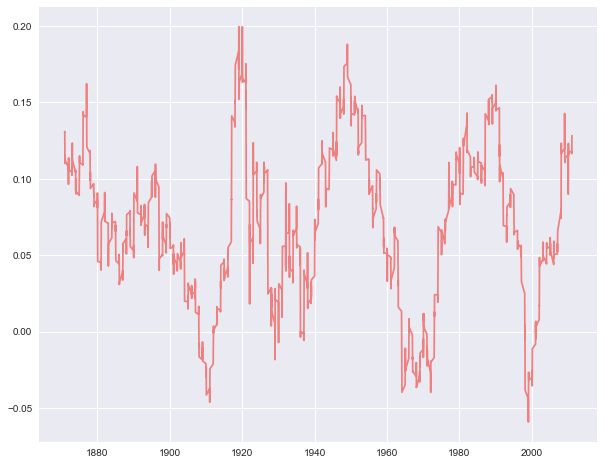

In [48]:
plt.figure(figsize=(10, 8))
plt.plot(ie_data["Date"], ie_data["10Y_Annualized_Stock_Real_Return"], label="Real Returns", color='lightcoral')